# Predicting Wine Types: Red or White?

### Loading In The Data

In [2]:
# Import pandas 
import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

### Data Exploration

In [3]:
# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null fl

In [59]:
# First rows of `red` 
red.head()

# Last rows of `white`
white.tail()

# Take a sample of 5 rows of `red`
red.sample(5)

# Describe `white`
white.describe()

# Double check for null values in `red`
pd.isnull(red)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
5             False             False        False           False      False   
6             False             False        False           False      False   
7             False             False        False           False      False   
8             False             False        False           False      False   
9             False             False        False           False      False   
10            False             False        False           False      False   
11            False             False        False           False      False   
12            False             False        False           False      False   
13            False             False        False           False      False   
14            False             False        False           False      False   
15            False             False        False           False      False   
16            False             False        False           False      False   
17            False             False        False           False      False   
18            False             False        False           False      False   
19            False             False        False           False      False   
20            False             False        False           False      False   
21            False             False        False           False      False   
22            False             False        False           False      False   
23            False             False        False           False      False   
24            False             False        False           False      False   
25            False             False        False           False      False   
26            False             False        False           False      False   
27            False             False        False           False      False   
28            False             False        False           False      False   
29            False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1569          False             False        False           False      False   
1570          False             False        False           False      False   
1571          False             False        False           False      False   
1572          False             False        False           False      False   
1573          False             False        False           False      False   
1574          False             False        False           False      False   
1575          False             False        False           False      False   
1576          False             False        False           False      False   
1577          False             False        False           False      False   
1578          False             False        False           False      False   
1579          False             False        False           False      False   
1580          False             False        False           False      False   
1581          False             False        False           False      False   
1582          False             False        False           False      False   
1583          False             False        False           False      False   
1584          False             False        False           False      False   
1585          False             False        False           False      False   
1586          False             False

### Visualizing The Data

#### Alcohol

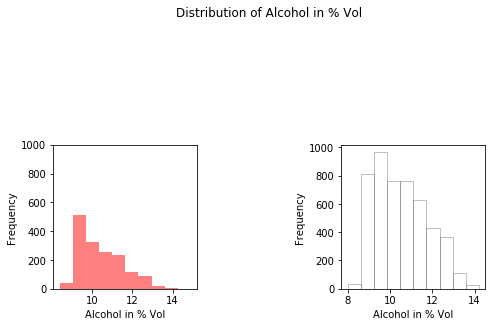

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

In [6]:
import numpy as np
print(np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15]))
print(np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

(array([  0,   7, 673, 452, 305, 133,  21,   8], dtype=int64), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7], dtype=int64), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


#### Sulfates

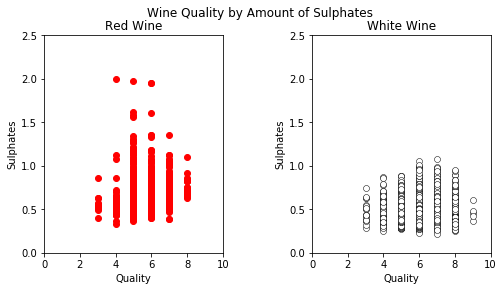

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

#### Acidity

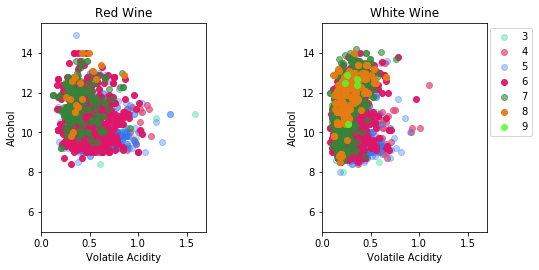

In [9]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

Most wines that were included in the data set have around 9% of alcohol.
Red wine seems to contain more sulphates than the white wine, which has less sulphates above 1 g/dm3.
You saw that most wines had a volatile acidity of 0.5 and below. At the moment, there is no direct relation to the quality of the wine.

### Preprocess Data

In [10]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

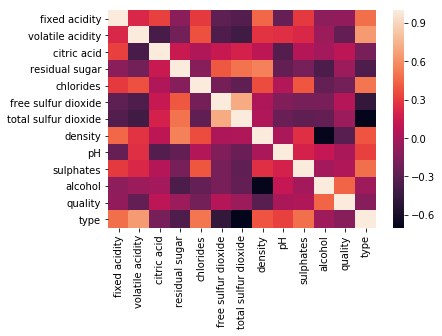

In [13]:
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

#### Train and Test Sets

In [15]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Specify the data 
X=wines.ix[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Standardize The Data

In [16]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

#### Model Data

In [17]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

C:\Users\raj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.2896654 ,  0.01695609, -0.1637314 , -0.4055706 , -0.1897687 ,
          0.05104744, -0.4755298 ,  0.04375035,  0.149944  ,  0.18585712,
          0.04605234,  0.4203161 ],
        [ 0.09246093, -0.00486219,  0.15394145, -0.3556453 ,  0.37075537,
         -0.09201503,  0.22433394,  0.49172276,  0.02939814, -0.00528288,
         -0.28554958, -0.29101855],
        [ 0.13772285,  0.10540932, -0.16185051, -0.13713309, -0.30931568,
          0.2913708 ,  0.22610158, -0.03789827,  0.03900152, -0.13670495,
          0.02206749,  0.07224816],
        [ 0.12972063, -0.46136355, -0.1358273 , -0.03706533,  0.21573442,
          0.21198452, -0.02762926, -0.19320443,  0.24703926, -0.4224128 ,
          0.29690397, -0.07473344],
        [-0.06937274,  0.13956004, -0.04767117,  0.03820831,  0.27192348,
         -0.47782913, -0.09866273, -0.42932004, -0.04532751, -0.17295876,
         -0.3432657 ,  0.4816057 ],
        [ 0.06270897,  0.10312521,  0.34606183, -0.12457022, -0.16116223,
      

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 12s 3ms/step - loss: 0.0901 - acc: 0.9688
Epoch 2/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0221 - acc: 0.9959
Epoch 3/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0195 - acc: 0.9968
Epoch 4/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0167 - acc: 0.9970
Epoch 5/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0152 - acc: 0.9975
Epoch 6/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0140 - acc: 0.9972
Epoch 7/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0132 - acc: 0.9972
Epoch 8/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0148 - acc: 0.9972
Epoch 9/20
4352/4352 [==============================] - 7s 1ms/step - loss: 0.0118 - acc: 0.9975
Epoch 10/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0109 - acc: 0.9975
Epoch 11/20
4352/4352 [=====

In [20]:
y_pred = model.predict(X_test)

In [28]:
y_pred = (y_pred > 0.5)

In [29]:
y_pred[:5]

array([[False],
       [ True],
       [False],
       [False],
       [False]])

In [30]:
y_test[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [31]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

2145/2145 [==============================] - 0s 87us/step
[0.026639779033696322, 0.9953379953379954]


In [33]:
# Import the modules from `sklearn.metrics`
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[1587,    1],
       [   9,  548]], dtype=int64)

In [34]:
# Precision 
precision_score(y_test, y_pred)

0.9981785063752276

In [35]:
# Recall
recall_score(y_test, y_pred)

0.9838420107719928

In [36]:
# F1 score
f1_score(y_test,y_pred)

0.9909584086799277

In [37]:
# Cohen's kappa
cohen_kappa_score(y_test, y_pred)

0.9878179265599869

#### Predicting Wine Quality

#### Preprocess Data

In [43]:
# Isolate target labels
Y = wines.quality

# Isolate data
X = wines.drop('quality', axis=1) 

In [44]:
# Scale the data with `StandardScaler`
X = StandardScaler().fit_transform(X)

#### Model Neural Network Architecture

In [45]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the model
model = Sequential()

# Add input layer 
model.add(Dense(64, input_dim=12, activation='relu'))
    
# Add output layer 
model.add(Dense(1))

#### Compile The Model, Fit The Data

In [46]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X[train], Y[train], epochs=10, verbose=1)

Epoch 1/10
5195/5195 [==============================] - 2s 375us/step - loss: 14.2576 - mean_absolute_error: 3.3457
Epoch 2/10
5195/5195 [==============================] - 0s 79us/step - loss: 1.6629 - mean_absolute_error: 1.0018
Epoch 3/10
5195/5195 [==============================] - 0s 88us/step - loss: 1.0362 - mean_absolute_error: 0.7853: 0s - loss: 1.1384 - mean_absolute_error: 0
Epoch 4/10
5195/5195 [==============================] - 0s 87us/step - loss: 0.7782 - mean_absolute_error: 0.6788
Epoch 5/10
5195/5195 [==============================] - 0s 75us/step - loss: 0.6443 - mean_absolute_error: 0.6187
Epoch 6/10
5195/5195 [==============================] - 0s 66us/step - loss: 0.5852 - mean_absolute_error: 0.5913
Epoch 7/10
5195/5195 [==============================] - 0s 68us/step - loss: 0.5511 - mean_absolute_error: 0.5772
Epoch 8/10
5195/5195 [==============================] - 0s 58us/step - loss: 0.5264 - mean_absolute_error: 0.5648
Epoch 9/10
5195/5195 [====================

In [50]:
y_pred = model.predict(X[test])

#### Evaluate Model

In [51]:
mse_value, mae_value = model.evaluate(X[test], Y[test], verbose=0)

print(mse_value)

0.4861034394781132


In [52]:
print(mae_value)

0.5478677794210894


In [53]:
from sklearn.metrics import r2_score

r2_score(Y[test], y_pred)

0.36037278200737555

#### Model Fine-Tuning

In [54]:
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [55]:
model = Sequential()
model.add(Dense(128, input_dim=12, activation='relu'))
model.add(Dense(1))

In [56]:
from keras.optimizers import RMSprop
rmsprop = RMSprop(lr=0.0001)
model.compile(optimizer=rmsprop, loss='mse', metrics=['mae'])

In [57]:
from keras.optimizers import SGD, RMSprop
sgd=SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['mae'])